<a href="https://colab.research.google.com/github/kasattack567/Computer-Science/blob/main/Chocolate_bar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. The Chocolate Bar Problem: A Coding Challenge

Intro:
In this problem, I use a heuristic and greedy approach to minimize the number of cuts to the chocolate bars.



In [24]:
!pip install pulp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 51.1 MB/s eta 0:00:00


In [44]:
def chocolate_challenge_debug(bars, children):
    """
    Solves the Chocolate Bar Problem with detailed debugging output for every step.

    Parameters:
    bars (List[int]): List of chocolate bar lengths.
    children (List[int]): List of chocolate amounts required by each child.

    Returns:
    int: Minimum number of cuts required, or -1 if it's not possible to satisfy all children.
    """
    # Initial check for impossible scenarios
    if sum(bars) < sum(children):
        print("Impossible to satisfy all children (sum of bars is less than sum of children).")
        return -1

    # Sort both lists in descending order
    bars.sort(reverse=True)
    children.sort(reverse=True)
    print(f"Initial bars: {bars}")
    print(f"Initial children: {children}")
    print("Checking for initial matches...\n")

    def remove_matches(bars, children):
        i = 0
        while i < len(children):
            if children[i] in bars:
                print(f"Match found! Removing {children[i]} from bars and children.")
                bars.remove(children[i])
                children.pop(i)
            else:
                i += 1

    remove_matches(bars, children)

    cuts = 0
    print(f"After initial match removal:\nBars: {bars}\nChildren: {children}\n")

    while children:
        largest_child = children.pop(0)  # Get the largest child's requirement
        print(f"Processing largest child: {largest_child}")

        while largest_child > 0:
            if not bars:
                print("No bars left. Cannot satisfy remaining children.")
                return -1

            largest_bar = bars.pop(0)  # Get the largest bar
            print(f"Using bar: {largest_bar}")

            if largest_bar == largest_child:
                # If the bar exactly matches the child's need, no cut is needed
                print(f"Exact match! Bar {largest_bar} satisfies child {largest_child} without a cut.")
                largest_child = 0
            elif largest_bar > largest_child:
                # If the bar is larger, make a cut and add the remainder back
                cuts += 1
                remainder = largest_bar - largest_child
                print(f"Cut made: {largest_bar} - {largest_child} = {remainder}. Total cuts: {cuts}")
                if remainder > 0:
                    bars.append(remainder)
                    bars.sort(reverse=True)
                    print(f"Remaining bar of size {remainder} added back to bars.")
                largest_child = 0
            else:
                # If the bar is smaller, subtract it from the child's need
                largest_child -= largest_bar
                print(f"Bar fully used. Remaining child need: {largest_child}")

        print(f"Current state after processing child:\nBars: {bars}\nChildren: {children}\n")

        remove_matches(bars, children)
        print(f"After match removal:\nBars: {bars}\nChildren: {children}\n")

    return cuts


# Specific Test Case
bars_test = [23, 12, 45, 7, 10]
children_test = [15, 8, 20, 5]

print("Running specific test case with debugging...\n")
result = chocolate_challenge_debug(bars_test[:], children_test[:])
print(f"Final Result: {result}")



Running specific test case with debugging...

Initial bars: [45, 23, 12, 10, 7]
Initial children: [20, 15, 8, 5]
Checking for initial matches...

After initial match removal:
Bars: [45, 23, 12, 10, 7]
Children: [20, 15, 8, 5]

Processing largest child: 20
Using bar: 45
Cut made: 45 - 20 = 25. Total cuts: 1
Remaining bar of size 25 added back to bars.
Current state after processing child:
Bars: [25, 23, 12, 10, 7]
Children: [15, 8, 5]

After match removal:
Bars: [25, 23, 12, 10, 7]
Children: [15, 8, 5]

Processing largest child: 15
Using bar: 25
Cut made: 25 - 15 = 10. Total cuts: 2
Remaining bar of size 10 added back to bars.
Current state after processing child:
Bars: [23, 12, 10, 10, 7]
Children: [8, 5]

After match removal:
Bars: [23, 12, 10, 10, 7]
Children: [8, 5]

Processing largest child: 8
Using bar: 23
Cut made: 23 - 8 = 15. Total cuts: 3
Remaining bar of size 15 added back to bars.
Current state after processing child:
Bars: [15, 12, 10, 10, 7]
Children: [5]

After match remo

In [42]:
def chocolate_challenge(bars, children):
    """
    Solves the Chocolate Bar Problem.

    Parameters:
    bars (List[int]): List of chocolate bar lengths.
    children (List[int]): List of chocolate amounts required by each child.

    Returns:
    int: Minimum number of cuts required, or -1 if it's not possible to satisfy all children.
    """
    # Initial check for impossible scenarios
    if sum(bars) < sum(children):
        return -1

    # Sort both lists in descending order
    bars.sort(reverse=True)
    children.sort(reverse=True)

    def remove_matches(bars, children):
        i = 0
        while i < len(children):
            if children[i] in bars:
                bars.remove(children[i])
                children.pop(i)
            else:
                i += 1

    remove_matches(bars, children)

    cuts = 0

    while children:
        largest_child = children.pop(0)  # Get the largest child's requirement

        while largest_child > 0:
            if not bars:
                return -1

            largest_bar = bars.pop(0)  # Get the largest bar

            if largest_bar == largest_child:
                # If the bar exactly matches the child's need, no cut is needed
                largest_child = 0
            elif largest_bar > largest_child:
                # If the bar is larger, make a cut and add the remainder back
                cuts += 1
                remainder = largest_bar - largest_child
                if remainder > 0:
                    bars.append(remainder)
                    bars.sort(reverse=True)
                largest_child = 0
            else:
                # If the bar is smaller, subtract it from the child's need
                largest_child -= largest_bar

        remove_matches(bars, children)

    return cuts


# Test cases
test_cases = [
    {"bars": [23, 12, 45, 7, 10], "children": [15, 8, 20, 5], "expected": 4 }
]

# Test execution
for i, case in enumerate(test_cases, 1):
    result = chocolate_challenge(case["bars"][:], case["children"][:])
    print(f"Test Case {i}:")
    print(f"Bars: {case['bars']}, Children: {case['children']}")
    print(f"Expected: {case['expected']}, Got: {result}")
    print("PASS" if result == case["expected"] else "FAIL")
    print()


Test Case 1:
Bars: [23, 12, 45, 7, 10], Children: [15, 8, 20, 5]
Expected: 3, Got: 4
FAIL



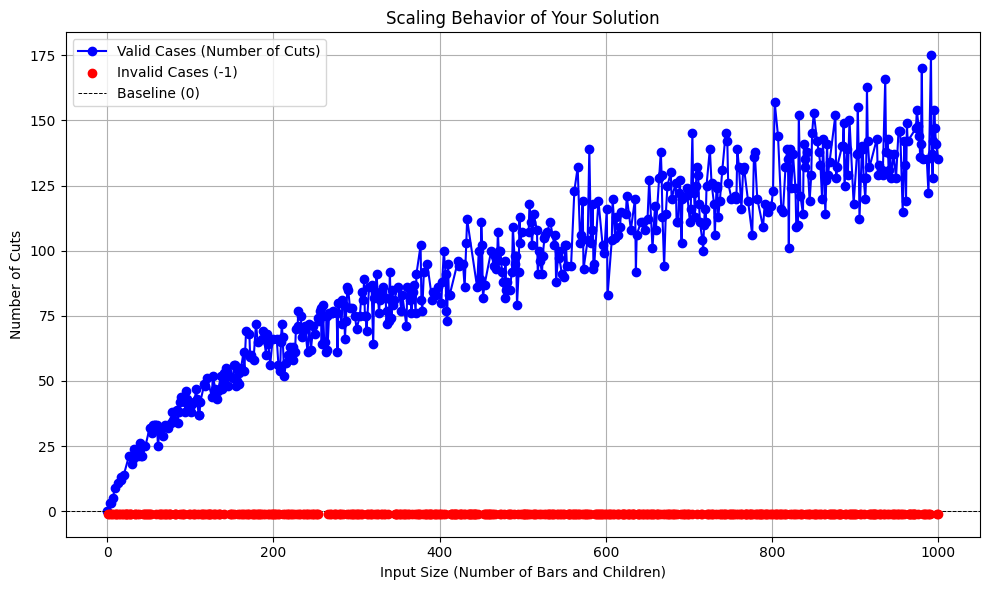

In [53]:
import random
import matplotlib.pyplot as plt
from typing import List
import numpy as np

def your_solution(bars: List[int], children: List[int]) -> int:
    if sum(bars) < sum(children):
        return -1

    bars = sorted(bars, reverse=True)
    children = sorted(children, reverse=True)

    def remove_matches(bars, children):
        i = 0
        while i < len(children):
            if children[i] in bars:
                bars.remove(children[i])
                children.pop(i)
            else:
                i += 1

    remove_matches(bars, children)

    cuts = 0

    while children:
        largest_child = children.pop(0)

        while largest_child > 0:
            if not bars:
                return -1
            largest_bar = bars.pop(0)

            if largest_bar == largest_child:
                largest_child = 0
            elif largest_bar > largest_child:
                cuts += 1
                remainder = largest_bar - largest_child
                if remainder > 0:
                    bars.append(remainder)
                    bars.sort(reverse=True)
                largest_child = 0
            else:
                largest_child -= largest_bar

        remove_matches(bars, children)

    return cuts

if __name__ == "__main__":
    #random.seed(0)

    # Parameters for simulation
    max_size = 1000  # Maximum size of bars/children lists
    step = 1  # Incremental step for the size
    valid_results = []
    invalid_results = []
    sizes = range(0, max_size + 1, step)

    # Run simulations for increasing input sizes
    for size in sizes:
        bars = [random.randint(1, 100) for _ in range(size)]
        children = [random.randint(1, 100) for _ in range(size)]
        cuts = your_solution(bars, children)
        if cuts == -1:
            invalid_results.append((size, cuts))
        else:
            valid_results.append((size, cuts))

    # Separate valid and invalid points
    valid_sizes, valid_cuts = zip(*valid_results) if valid_results else ([], [])
    invalid_sizes, invalid_cuts = zip(*invalid_results) if invalid_results else ([], [])

    # Plot results
    plt.figure(figsize=(10, 6))
    if valid_results:
        plt.plot(valid_sizes, valid_cuts, marker='o', linestyle='-', color='blue', label='Valid Cases (Number of Cuts)')
    if invalid_results:
        plt.scatter(invalid_sizes, invalid_cuts, color='red', label='Invalid Cases (-1)', zorder=5)
    plt.title("Scaling Behavior of Your Solution")
    plt.xlabel("Input Size (Number of Bars and Children)")
    plt.ylabel("Number of Cuts")
    plt.axhline(y=0, color='black', linestyle='--', linewidth=0.7, label='Baseline (0)')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


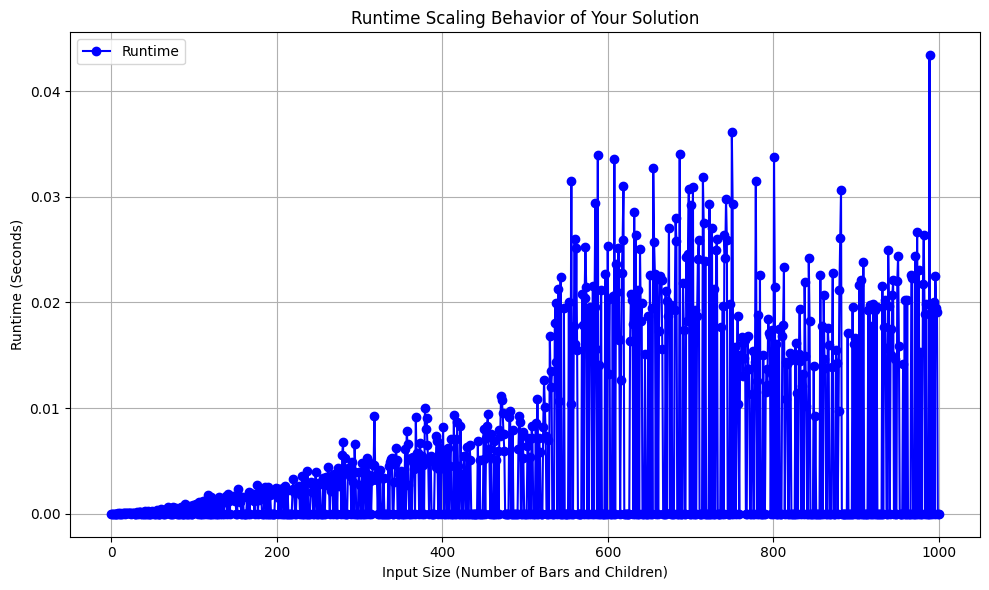

In [89]:
import random
import matplotlib.pyplot as plt
import time
from typing import List

def your_solution(bars: List[int], children: List[int]) -> int:
    if sum(bars) < sum(children):
        return -1

    bars = sorted(bars, reverse=True)
    children = sorted(children, reverse=True)

    def remove_matches(bars, children):
        i = 0
        while i < len(children):
            if children[i] in bars:
                bars.remove(children[i])
                children.pop(i)
            else:
                i += 1

    remove_matches(bars, children)

    cuts = 0

    while children:
        largest_child = children.pop(0)

        while largest_child > 0:
            if not bars:
                return -1
            largest_bar = bars.pop(0)

            if largest_bar == largest_child:
                largest_child = 0
            elif largest_bar > largest_child:
                cuts += 1
                remainder = largest_bar - largest_child
                if remainder > 0:
                    bars.append(remainder)
                    bars.sort(reverse=True)
                largest_child = 0
            else:
                largest_child -= largest_bar

        remove_matches(bars, children)

    return cuts

if __name__ == "__main__":
    # Parameters for simulation
    max_size = 1000  # Maximum size of bars/children lists
    step = 1  # Incremental step for the size
    sizes = range(0, max_size + 1, step)
    runtimes = []

    # Run simulations for increasing input sizes
    for size in sizes:
        bars = [random.randint(1, 100) for _ in range(size)]
        children = [random.randint(1, 100) for _ in range(size)]

        start_time = time.time()  # Start timer
        your_solution(bars, children)
        end_time = time.time()  # End timer

        runtime = end_time - start_time
        runtimes.append(runtime)

    # Plot runtime vs input size
    plt.figure(figsize=(10, 6))
    plt.plot(sizes, runtimes, marker='o', linestyle='-', color='blue', label='Runtime')
    plt.title("Runtime Scaling Behavior of Your Solution")
    plt.xlabel("Input Size (Number of Bars and Children)")
    plt.ylabel("Runtime (Seconds)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


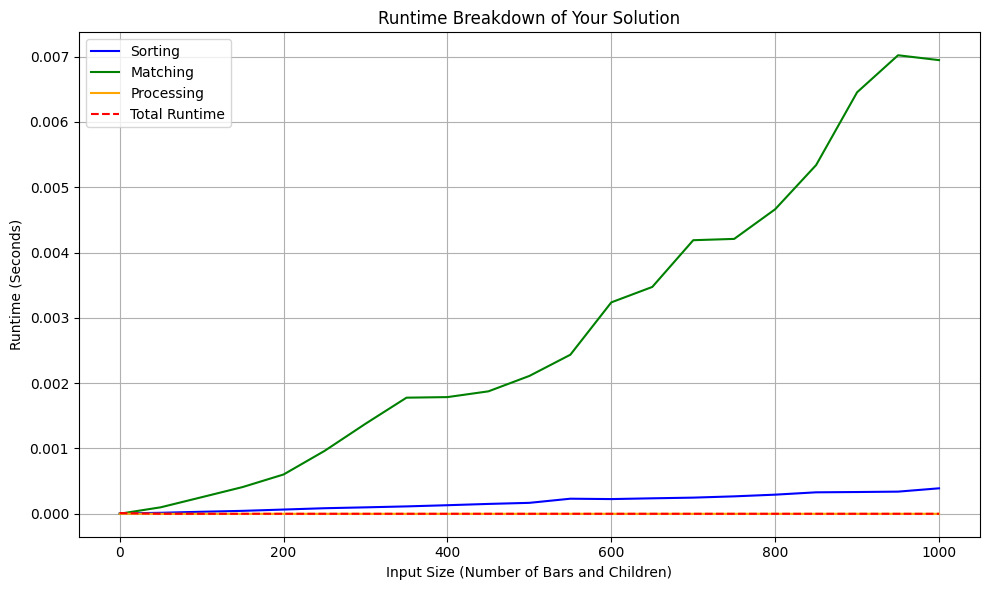


Cases with High Variability:


In [78]:
import random
import matplotlib.pyplot as plt
import time
from typing import List
from collections import defaultdict

def your_solution_with_breakdown(bars: List[int], children: List[int]) -> dict:
    """
    Solves the Chocolate Bar Problem with detailed runtime breakdown.
    Returns a dictionary with timing information and the result.
    """
    timings = defaultdict(float)  # To store time for each step

    start = time.time()

    # Sorting Bars and Children
    sort_start = time.time()
    bars = sorted(bars, reverse=True)
    children = sorted(children, reverse=True)
    timings["Sorting"] += time.time() - sort_start

    def remove_matches(bars, children):
        match_start = time.time()
        i = 0
        while i < len(children):
            if children[i] in bars:
                bars.remove(children[i])
                children.pop(i)
            else:
                i += 1
        timings["Matching"] += time.time() - match_start

    # Remove exact matches
    remove_matches(bars, children)

    cuts = 0
    process_start = time.time()

    while children:
        largest_child = children.pop(0)

        while largest_child > 0:
            if not bars:
                return {"result": -1, "timings": timings}
            largest_bar = bars.pop(0)

            if largest_bar == largest_child:
                largest_child = 0
            elif largest_bar > largest_child:
                cuts += 1
                remainder = largest_bar - largest_child
                if remainder > 0:
                    bars.append(remainder)
                    bars.sort(reverse=True)
            else:
                largest_child -= largest_bar

        remove_matches(bars, children)

    timings["Processing"] += time.time() - process_start
    timings["Total"] = time.time() - start

    return {"result": cuts, "timings": timings}

if __name__ == "__main__":
    # Parameters for simulation
    max_size = 1000  # Maximum size of bars/children lists
    step = 50  # Incremental step for the size
    sizes = range(0, max_size + 1, step)

    breakdown_results = []
    variability_data = []

    for size in sizes:
        bars = [random.randint(1, 100) for _ in range(size)]
        children = [random.randint(1, 100) for _ in range(size)]

        result = your_solution_with_breakdown(bars, children)
        breakdown_results.append((size, result["timings"]))

        # Log cases with high variability
        if result["timings"]["Total"] > 0.05:  # Example threshold for "slow" cases
            variability_data.append({
                "size": size,
                "bars": bars,
                "children": children,
                "timings": result["timings"]
            })

    # Plot runtime breakdown
    sorting_times = [timing["Sorting"] for _, timing in breakdown_results]
    matching_times = [timing["Matching"] for _, timing in breakdown_results]
    processing_times = [timing["Processing"] for _, timing in breakdown_results]
    total_times = [timing["Total"] for _, timing in breakdown_results]

    plt.figure(figsize=(10, 6))
    plt.plot(sizes, sorting_times, label="Sorting", color="blue")
    plt.plot(sizes, matching_times, label="Matching", color="green")
    plt.plot(sizes, processing_times, label="Processing", color="orange")
    plt.plot(sizes, total_times, label="Total Runtime", color="red", linestyle="--")
    plt.title("Runtime Breakdown of Your Solution")
    plt.xlabel("Input Size (Number of Bars and Children)")
    plt.ylabel("Runtime (Seconds)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Analyze variability
    print("\nCases with High Variability:")
    for case in variability_data:
        print(f"Input Size: {case['size']}")
        print(f"Bars: {case['bars']}")
        print(f"Children: {case['children']}")
        print(f"Timings: {case['timings']}")
        print("-" * 50)


In [98]:
import random
import time
from collections import defaultdict

def your_solution_with_profiling(bars, children):
    timings = defaultdict(float)
    iterations = {"matching": 0, "processing": 0, "sorting": 0}

    start_time = time.time()

    # Sorting
    sort_start = time.time()
    bars = sorted(bars, reverse=True)
    children = sorted(children, reverse=True)
    timings["Sorting"] += time.time() - sort_start
    iterations["sorting"] += 1  # Initial sort

    def remove_matches(bars, children):
        match_start = time.time()
        i = 0
        while i < len(children):
            iterations["matching"] += 1  # Count matching iterations
            if children[i] in bars:
                bars.remove(children[i])
                children.pop(i)
            else:
                i += 1
        timings["Matching"] += time.time() - match_start

    # Remove matches
    remove_matches(bars, children)

    cuts = 0
    process_start = time.time()

    while children:
        iterations["processing"] += 1  # Count processing iterations
        largest_child = children.pop(0)

        while largest_child > 0:
            if not bars:
                return {"result": -1, "timings": timings, "iterations": iterations}

            largest_bar = bars.pop(0)
            if largest_bar == largest_child:
                largest_child = 0
            elif largest_bar > largest_child:
                cuts += 1
                remainder = largest_bar - largest_child
                if remainder > 0:
                    bars.append(remainder)
                    sort_start = time.time()
                    bars.sort(reverse=True)
                    timings["Sorting"] += time.time() - sort_start
                    iterations["sorting"] += 1  # Count sorting calls
                largest_child = 0
            else:
                largest_child -= largest_bar

        remove_matches(bars, children)

    timings["Processing"] += time.time() - process_start
    timings["Total"] = time.time() - start_time

    return {"result": cuts, "timings": timings, "iterations": iterations}

if __name__ == "__main__":
    bars = [random.randint(1, 100) for _ in range(500)]
    children = [random.randint(1, 100) for _ in range(500)]

    result = your_solution_with_profiling(bars, children)
    print("Timings:", result["timings"])
    print("Iterations:", result["iterations"])


Timings: defaultdict(<class 'float'>, {'Sorting': 0.0005266666412353516, 'Matching': 0.013359785079956055, 'Processing': 0.011863946914672852, 'Total': 0.014113664627075195})
Iterations: {'matching': 5453, 'processing': 89, 'sorting': 90}
